# Preprocessing

### Setup
- This code assumes the data is in a 'data' directory (with 'train' and 'test' subdirectories) in the same directory as the notebook:

```
    /home
        Preprocessing.ipynb
        data/
            test/
            train/
```
- Additionally, for this project the training data is assumed to be placed in ten subdirectories (representing the 10 classes) when it is downloaded.

In [1]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data'

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

%cd $LESSON_HOME_DIR
#import modules
from utils import *
import vgg16; reload(vgg16)
from vgg16 import Vgg16
from shutil import copyfile
import numpy as np
from glob import glob

%matplotlib inline

/home/ubuntu/courses/deeplearning1/nbs/statefarm2


Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
# Create directory structure:
%cd $DATA_HOME_DIR

%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data


In [4]:
# Create subdirectory structure for the validation data (10 class labels):

%cd $DATA_HOME_DIR/valid
for i in range(10):
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/valid/c' + str(i)))

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid


In [5]:
# Repeat this process so we have subdirectories for our sample training and validation sets.
for i in range(10):
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/sample/valid/c' + str(i)))
    os.mkdir(os.path.expanduser(DATA_HOME_DIR + '/sample/train/c' + str(i)))

### Create validation set

In [6]:
# Move 450 randomly chosen image files from each training data class to create validation set:

%cd $DATA_HOME_DIR/train
for i in range(10):
    class_path = DATA_HOME_DIR + '/train/c' + str(i)
    %cd $class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(450):
        os.rename(shuf[j], DATA_HOME_DIR + '/valid/' + ('c' + str(i) + '/') + shuf[j])
        #print(DATA_HOME_DIR + '/valid/' + ('c' + str(i) + '/') + shuf[j])

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c7
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c8
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c9


### Create sample data set (w/validation, test and train data)

In [7]:
from shutil import copyfile

In [8]:
# Create sample data. Includes copying files from both train and valid to create miniature subsets of each.

for i in range(10):
    train_class_path = DATA_HOME_DIR + '/train/c' + str(i)
    valid_class_path = DATA_HOME_DIR + '/valid/c' + str(i)
    %cd $train_class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(10):
        copyfile(shuf[j], DATA_HOME_DIR+'/sample/train/c' + str(i) + '/' + shuf[j])
        #print DATA_HOME_DIR+'/sample/train/c' + str(i) + '/' + shuf[j]
    %cd $valid_class_path
    g = glob('*.jpg')
    shuf = np.random.permutation(g)
    for j in range(3):
        copyfile(shuf[j], DATA_HOME_DIR+'/sample/valid/c' + str(i) + '/' + shuf[j])
        #print DATA_HOME_DIR+'/sample/valid/c' + str(i) + '/' + shuf[j]

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c0
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c1
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c2
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c3
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c4
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c5
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/valid/c6
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/train/c7
/home/ubuntu/courses/deeplearning1/nbs/s

In [9]:
# We also need to sample the test data.

%cd $DATA_HOME_DIR/test
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(500):
    copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/' + shuf[i])
    #print(DATA_HOME_DIR+'/sample/test/' + shuf[i])

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/test


In [10]:
# We need to move the test data to an 'unknown' directory so vgg can read it.

%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

%cd $DATA_HOME_DIR/sample/test
%mkdir unknown
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/test
/home/ubuntu/courses/deeplearning1/nbs/statefarm2/data/sample/test


### Train and finetune the model

In [4]:
%cd $LESSON_HOME_DIR

vgg = Vgg16()
batch_size = 64

/home/ubuntu/courses/deeplearning1/nbs/statefarm2


#### Set up file paths

In [6]:
#Use the second path variable for testing on a small sample.

path = DATA_HOME_DIR 
#path = DATA_HOME_DIR + '/sample'

test_path = path + '/test/'
results_path=DATA_HOME_DIR + '/results/'
valid_path = path + '/valid/'
train_path = path + '/train/'


In [13]:
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)

Found 17924 images belonging to 10 classes.
Found 4500 images belonging to 10 classes.


In [14]:
vgg.finetune(batches)
vgg.model.optimizer.lr = 0.0001

### Train the vgg model

In [16]:
# Need to add in the latest version of the weights filename; can't work out how to add it programmatically.
vgg.model.load_weights(results_path + 'ft8.h5')
vgg.model.optimizer.lr = 0.0005

In [17]:
#For each epoch we test our model against the validation set
latest_weights_filename = None
no_of_epochs = 6
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % (epoch + 8)
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
17924/17924 [==============================] - 540s - loss: 1.2122 - acc: 0.5967 - val_loss: 0.5755 - val_acc: 0.8564
Running epoch: 1
Epoch 1/1
17924/17924 [==============================] - 540s - loss: 1.1318 - acc: 0.6234 - val_loss: 0.5389 - val_acc: 0.8673
Running epoch: 2
Epoch 1/1
17924/17924 [==============================] - 542s - loss: 1.0577 - acc: 0.6455 - val_loss: 0.5164 - val_acc: 0.8627
Running epoch: 3
Epoch 1/1
17924/17924 [==============================] - 541s - loss: 0.9946 - acc: 0.6676 - val_loss: 0.4867 - val_acc: 0.8824
Running epoch: 4
Epoch 1/1
17924/17924 [==============================] - 541s - loss: 0.9609 - acc: 0.6745 - val_loss: 0.4600 - val_acc: 0.8924
Running epoch: 5
Epoch 1/1
17924/17924 [==============================] - 541s - loss: 0.9113 - acc: 0.6927 - val_loss: 0.4374 - val_acc: 0.9011
Completed 6 fit operations


## Generate predictions

In [7]:
# Optional
vgg.model.load_weights(results_path + 'ft13.h5')

In [ ]:
batches, preds = vgg.test(test_path, batch_size=batch_size)

Found 79726 images belonging to 1 classes.


In [20]:
filenames = batches.filenames
print(filenames[:2])

['unknown/img_81601.jpg', 'unknown/img_14887.jpg']


In [ ]:
from PIL import Image

Image.open(test_path + filenames[0])

In [21]:
# Optional: save our results for later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validate Predictions

In [8]:
vgg.model.load_weights(results_path + 'ft13.h5')
val_batches, val_probs = vgg.test(valid_path,batch_size=batch_size)
val_filenames = val_batches.filenames
expected_labels = val_batches.classes

Found 7000 images belonging to 10 classes.


In [9]:
predicted_labels = ([np.argmax(p) for p in val_probs])

In [10]:
from keras.preprocessing import image
n_view = 4
def plots_idx(idx,titles=None):
    plots([image.load_img(valid_path + val_filenames[i]) for i in idx],titles=titles)

Found 6372 correct labels
Confidence:
[0.94535023, 0.96993399, 0.99122846, 0.96278447]


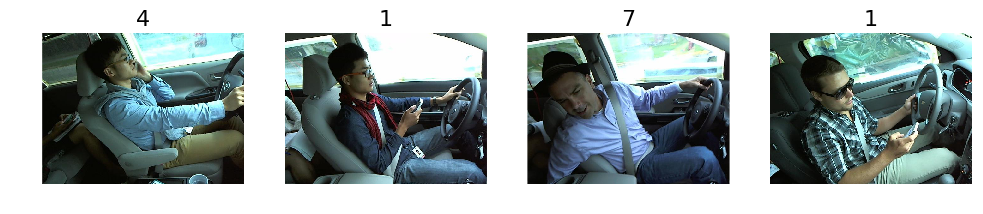

In [11]:
# Cases that the model guessed correctly
correct = np.where(predicted_labels == expected_labels)[0]
print("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print("Confidence:")
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx][i][args[i]] for i in range(len(args))])

Found 628 incorrect labels
Confidence:
[0.59124404, 0.70087129, 0.95206016, 0.44185472]
Predicted probability of the correct answer:
[0.3755919, 0.098423786, 0.0056196465, 0.32753855]


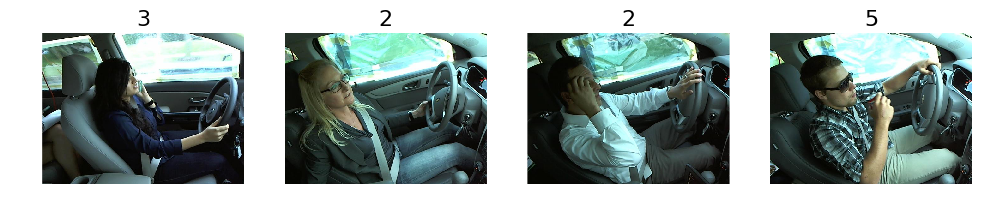

In [12]:
# Cases where the model guessed incorrectly
incorrect = np.where(predicted_labels != expected_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print("Confidence:")
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx][i][args[i]] for i in range(len(args))])
print("Predicted probability of the correct answer:")
correct_labels = expected_labels[idx]
print([val_probs[idx[i]][correct_labels[i]] for i in range(len(idx))])

Found 3245 confident correct predictions.
Confidence:
[0.99970311, 0.99090803, 0.97486693, 0.97813046]


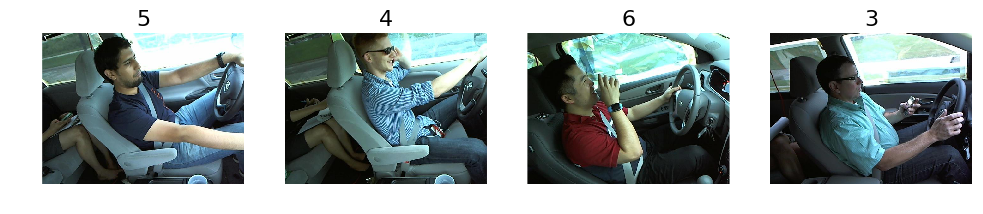

In [13]:
# Most confident correct predictions:
confident_predictions = np.where((np.max(val_probs,axis=1)>=0.95) & (predicted_labels==expected_labels))[0]
print("Found %d confident correct predictions." % len(confident_predictions))
idx = permutation(confident_predictions)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print('Confidence:')
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx[i]][args[i]] for i in range(len(args))])

Found 9 confident incorrect predictions.
Confidence:
[0.97957063, 0.95549065, 0.96094823, 0.99558026]
Predicted probability of the correct answer:
[0.0067041833, 0.00094115501, 0.026756946, 0.002659864]


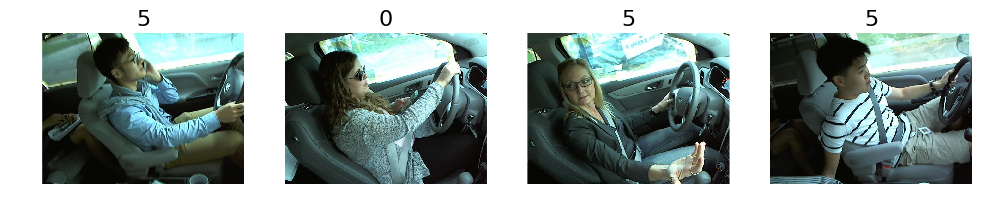

In [14]:
# Most confident incorrect predictions:
incorrect_confident = np.where((np.max(val_probs,axis=1)>=0.95) & (predicted_labels!=expected_labels))[0]
print("Found %d confident incorrect predictions." % len(incorrect_confident))
idx = permutation(incorrect_confident)[:n_view]
plots_idx(idx, [np.argmax(p) for p in val_probs[idx]])
print('Confidence:')
args = [np.argmax(p) for p in val_probs[idx]]
print([val_probs[idx[i]][args[i]] for i in range(len(args))])
print("Predicted probability of the correct answer:")
correct_labels = expected_labels[idx]
print([val_probs[idx[i]][correct_labels[i]] for i in range(len(idx))])

Confidence:
[0.49985483, 0.49968323, 0.50047714, 0.50055182]


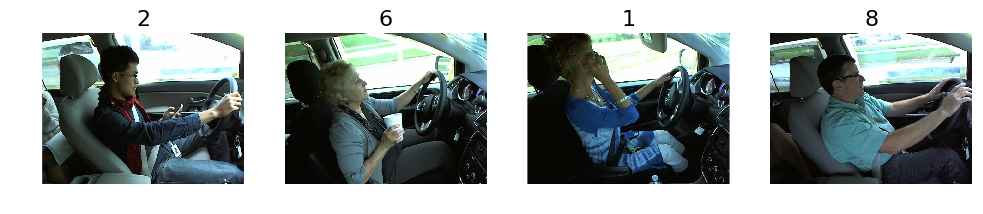

In [15]:
# Least confident predictions:

most_uncertain = np.argsort(np.abs(np.amax(val_probs,axis=1)-0.5))
idx = most_uncertain[:n_view]
args = [np.argmax(p) for p in val_probs[idx]]
plots_idx(idx, args)
print("Confidence:")
print([val_probs[idx][i][args[i]] for i in range(len(args))])

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, predicted_labels)

[[624  10  11   6   5  28  11   0   1   4]
 [  5 655   7   6   0   6  15   0   2   4]
 [  0   1 692   1   0   0   6   0   0   0]
 [  4   4   4 673  10   1   3   0   1   0]
 [ 10   3   5  18 640  18   4   0   2   0]
 [  6   0   1   2   0 690   0   0   1   0]
 [  1  12  18   0   2   6 658   0   2   1]
 [  3   9  16   1   3  22  18 622   3   3]
 [  5  17  38   7  15  18  32  15 542  11]
 [ 31  11   1   2  13  29  18   0  19 576]]


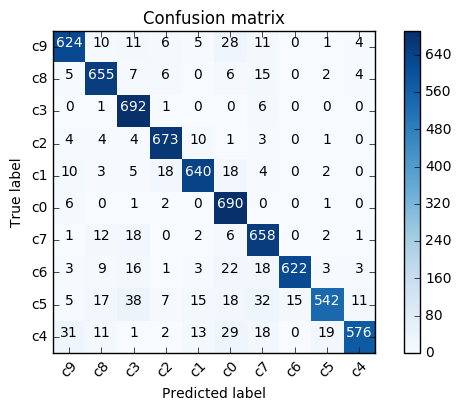

In [17]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Prepare CSV for submission

In [ ]:
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [22]:
ids = np.array([int(f[12:f.find('.')]) for f in filenames])
clipped = preds.clip(min=0.05,max=0.95)

In [23]:
print(clipped[1])

[ 0.167   0.0718  0.005   0.0109  0.005   0.017   0.1057  0.0083  0.5982  0.0206]


In [24]:
results = np.hstack((np.expand_dims(ids, axis=1),clipped))

In [25]:
print results[1]

[  1.4887e+04   1.6697e-01   7.1772e-02   5.0000e-03   1.0879e-02   5.0000e-03   1.7047e-02
   1.0570e-01   8.2894e-03   5.9822e-01   2.0600e-02]


In [26]:
%cd $DATA_HOME_DIR
submission_file_name = "statefarm_submission1.csv"
with open(submission_file_name, 'wb') as fh:
    np.savetxt(fh,results,fmt='img_%d.jpg,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f,%.5f',header='img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9',comments="")

/home/ubuntu/courses/deeplearning1/nbs/statefarm/data


In [27]:
from IPython.display import FileLink
%cd $LESSON_HOME_DIR
FileLink('data/'+submission_file_name)

/home/ubuntu/courses/deeplearning1/nbs/statefarm


/home/ubuntu/courses/deeplearning1/nbs/statefarm/data/statefarm_submission1.csv